### Importing required Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [6]:
import seaborn as sns
sns.set(style='white',color_codes = True, font_scale=1.5)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [15]:
## Data Exploration

In [8]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.shape

(891, 12)

In [12]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
## Checking missing values

In [17]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df_train.drop(['PassengerId','Ticket','Name','Cabin'],axis=1,inplace= True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df_train.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [24]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [25]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx,axis=1)

In [26]:
df_train.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.201019,0.416667,0.356481,84.154687
2,0.472826,29.825163,0.402174,0.380435,20.662183
3,0.242363,24.824684,0.615071,0.393075,13.675550


In [27]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [28]:
df_train.dropna(inplace=True)

In [37]:
df_train_dummied = pd.get_dummies(df_train,columns=['Sex'],drop_first=True)

In [38]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=['Embarked'],drop_first=True)

In [39]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<AxesSubplot:>

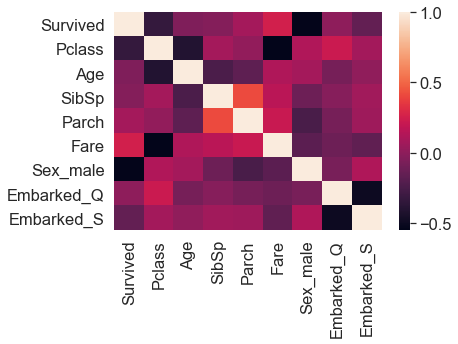

In [40]:
## Identifying variables that are correlated
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [42]:
x = df_train_dummied.drop('Survived',axis=1)
y = df_train_dummied.Survived

In [45]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size = 0.3,random_state=1)

In [46]:
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)

C:\Users\Priyank\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
Ypred = lr.predict(Xtest)

In [48]:
metrics.accuracy_score(Ytest,Ypred)

0.846441947565543

In [49]:
metrics.confusion_matrix(Ytest,Ypred)

array([[145,  21],
       [ 20,  81]], dtype=int64)

In [50]:
print(classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       166
           1       0.79      0.80      0.80       101

    accuracy                           0.85       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267



In [52]:
lr.predict_proba(Xtest)

array([[0.28963778, 0.71036222],
       [0.42979604, 0.57020396],
       [0.94467792, 0.05532208],
       [0.25252283, 0.74747717],
       [0.93902714, 0.06097286],
       [0.14377142, 0.85622858],
       [0.36399058, 0.63600942],
       [0.5500892 , 0.4499108 ],
       [0.7874589 , 0.2125411 ],
       [0.44167819, 0.55832181],
       [0.71747425, 0.28252575],
       [0.25493674, 0.74506326],
       [0.73192687, 0.26807313],
       [0.15780561, 0.84219439],
       [0.85671905, 0.14328095],
       [0.4021187 , 0.5978813 ],
       [0.89747894, 0.10252106],
       [0.32394399, 0.67605601],
       [0.19118089, 0.80881911],
       [0.38621845, 0.61378155],
       [0.89754498, 0.10245502],
       [0.51921363, 0.48078637],
       [0.85296448, 0.14703552],
       [0.93171498, 0.06828502],
       [0.50734316, 0.49265684],
       [0.5520263 , 0.4479737 ],
       [0.04546056, 0.95453944],
       [0.86153164, 0.13846836],
       [0.89095687, 0.10904313],
       [0.31813809, 0.68186191],
       [0.